### Refining Data

In [109]:
import pandas as pd


In [110]:
crop_yield = pd.read_csv('Data\crop_yield.csv')
crop_data = pd.read_csv('Data\Crop_Data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\leela\AppData\Local\Temp\ipykernel_14616\3554207137.py:1: SyntaxWarning: invalid escape sequence '\c'
  crop_yield = pd.read_csv('Data\crop_yield.csv')
C:\Users\leela\AppData\Local\Temp\ipykernel_14616\3554207137.py:2: SyntaxWarning: invalid escape sequence '\C'
  crop_data = pd.read_csv('Data\Crop_Data.csv')


In [111]:
crop_yield.info()
crop_yield.drop(["Crop_Year","Area","Fertilizer","Pesticide","Yield"],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [112]:
crop_data.info()
crop_data.drop(["Area","Price","Rainfall"],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373 entries, 0 to 5372
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              5373 non-null   object 
 1   Season            5373 non-null   object 
 2   State             5373 non-null   object 
 3   Area              5373 non-null   float64
 4   Soil Type         5373 non-null   object 
 5   Pesticide Usage   5373 non-null   object 
 6   pH                5373 non-null   object 
 7   Temperature       5373 non-null   object 
 8   Fertilizer Usage  5373 non-null   object 
 9   Price             5373 non-null   float64
 10  Rainfall          5373 non-null   float64
dtypes: float64(3), object(8)
memory usage: 461.9+ KB


In [113]:
# Clean whitespace in key columns
for df in [crop_yield, crop_data]:
    df['Crop'] = df['Crop'].str.strip()
    df['Season'] = df['Season'].str.strip()
    df['State'] = df['State'].str.strip()

In [114]:
final_merged_df = pd.merge(
    crop_yield,
    crop_data,
    on=['Crop', 'Season', 'State'],
    how='inner'
)

In [115]:
print("Final Merged DataFrame Columns:", final_merged_df.columns.tolist())
print("\nSample Rows:")
print(final_merged_df.head())

Final Merged DataFrame Columns: ['Crop', 'Season', 'State', 'Production', 'Annual_Rainfall', 'Soil Type', 'Pesticide Usage', 'pH', 'Temperature', 'Fertilizer Usage']

Sample Rows:
           Crop  Season  State  Production  Annual_Rainfall      Soil Type  \
0  Cotton(lint)  Kharif  Assam         794           2051.4     Black Soil   
1  Cotton(lint)  Kharif  Assam         794           2051.4     Black Soil   
2  Cotton(lint)  Kharif  Assam         794           2051.4     Black Soil   
3  Cotton(lint)  Kharif  Assam         794           2051.4     Black Soil   
4  Cotton(lint)  Kharif  Assam         794           2051.4  Alluvial Soil   

  Pesticide Usage       pH Temperature Fertilizer Usage  
0             low  Average      Medium             High  
1            high  Average      Medium              Low  
2             low     High      Medium           Medium  
3             low      Low        High             High  
4            high     High        High              Low  


In [116]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95321 entries, 0 to 95320
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              95321 non-null  object 
 1   Season            95321 non-null  object 
 2   State             95321 non-null  object 
 3   Production        95321 non-null  int64  
 4   Annual_Rainfall   95321 non-null  float64
 5   Soil Type         95321 non-null  object 
 6   Pesticide Usage   95321 non-null  object 
 7   pH                95321 non-null  object 
 8   Temperature       95321 non-null  object 
 9   Fertilizer Usage  95321 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.3+ MB


In [117]:
final_merged_df.to_csv("data/new_data.csv")

### Data preprocessing Start

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [119]:
final_merged_df

,Crop,Season,State,Production,Annual_Rainfall,Soil Type,Pesticide Usage,pH,Temperature,Fertilizer Usage
0,Cotton(lint),Kharif,Assam,794,2051.4,Black Soil,low,Average,Medium,High
1,Cotton(lint),Kharif,Assam,794,2051.4,Black Soil,high,Average,Medium,Low
2,Cotton(lint),Kharif,Assam,794,2051.4,Black Soil,low,High,Medium,Medium
3,Cotton(lint),Kharif,Assam,794,2051.4,Black Soil,low,Low,High,High
4,Cotton(lint),Kharif,Assam,794,2051.4,Alluvial Soil,high,High,High,Low
...,...,...,...,...,...,...,...,...,...,...
95316,Wheat,Rabi,Jammu and Kashmir,392160,1356.2,Red/Yellow Soil,high,Low,Medium,Medium
95317,Wheat,Rabi,Jammu and Kashmir,392160,1356.2,Laterile Soil,low,High,High,High
95318,Wheat,Rabi,Jammu and Kashmir,392160,1356.2,Red/Yellow Soil,high,Low,Low,Low
95319,Wheat,Rabi,Jammu and Kashmir,392160,1356.2,Alluvial Soil,low,Average,Medium,Medium


In [135]:
final_merged_df["Season"].value_counts()

Season
Kharif        30065
Rabi          17297
Whole Year    15878
Summer         8795
Autumn         3998
Winter         2627
Name: count, dtype: int64

<Axes: ylabel='Production'>

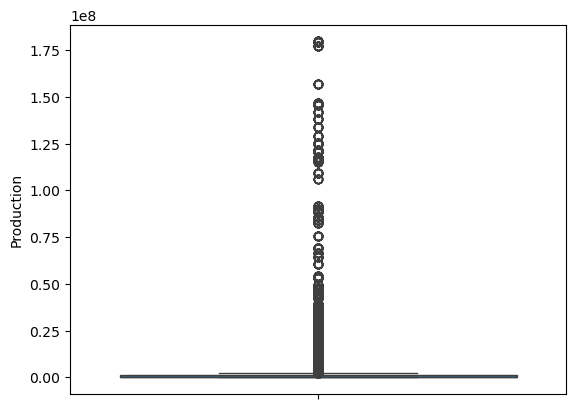

In [120]:
sns.boxplot(final_merged_df["Production"])

In [121]:
final_merged_df["Production"].describe()

count    9.532100e+04
mean     2.589680e+06
std      1.026405e+07
min      0.000000e+00
25%      1.464900e+04
50%      1.362810e+05
75%      1.028700e+06
max      1.796982e+08
Name: Production, dtype: float64

In [122]:
Q1 = final_merged_df["Production"].quantile(0.25)
Q3 = final_merged_df["Production"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for i in range(95321):
    if(final_merged_df.loc[i,"Production"]<lower_bound or final_merged_df.loc[i,"Production"]>upper_bound):
        final_merged_df.drop(i,axis=0,inplace=True)

<Axes: ylabel='Production'>

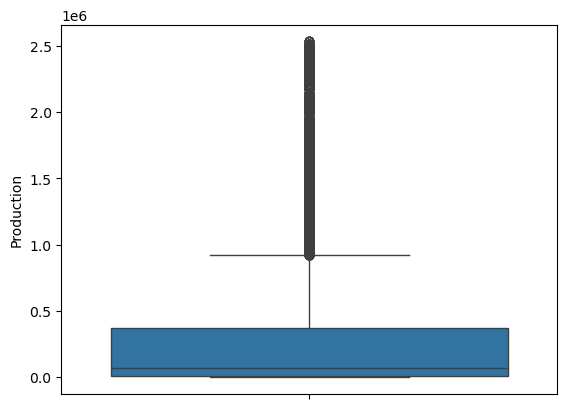

In [127]:
sns.boxplot(final_merged_df["Production"])

<Axes: xlabel='Production', ylabel='Count'>

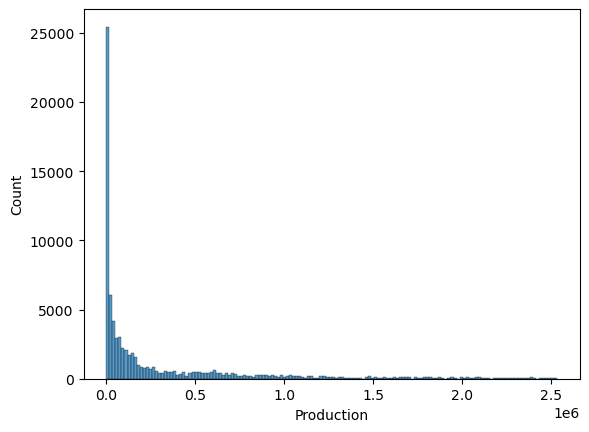

In [129]:
sns.histplot(final_merged_df["Production"])

In [130]:
final_merged_df["Production"].value_counts()

Production
2          145
6          119
226        119
80         113
3           99
          ... 
1355660      1
12090        1
520983       1
3930         1
209189       1
Name: count, Length: 4148, dtype: int64

In [126]:
final_merged_df["Soil Type"].value_counts()

Soil Type
Alluvial Soil      32793
Black Soil         16992
Red/Yellow Soil    16896
Laterile Soil      11979
Name: count, dtype: int64

In [124]:
for i in list(set(final_merged_df["Soil Type"])):
    print(i,":",final_merged_df[final_merged_df["Soil Type"]==i]["Production"].mean())

Alluvial Soil : 303836.558198396
Red/Yellow Soil : 279665.08617424243
Laterile Soil : 262712.4128057434
Black Soil : 356285.7525894539


In [136]:
freq_encode_cols = ["Crop","Season","State"]
for i in freq_encode_cols:
    freq_map = final_merged_df.loc[:,i].value_counts().to_dict()
    final_merged_df.loc[:,i+'_f'] = final_merged_df.loc[:,i].map(freq_map)
    final_merged_df.drop(columns=[i],inplace=True)

In [138]:
final_merged_df["Pesticide Usage"].value_counts()

Pesticide Usage
low     39363
high    39297
Name: count, dtype: int64

In [ ]:
ordinal_encoding_cols = {"pH":["Low","Medium","High"],"Temperature":["low","Medium","High"],"Fertilizer Usage":["low","Average","High"],"Pesticide Usage":["Low","High"]}
import category_encoders as ce
for i,j in ordinal_encoding_cols.items():
    oe = ce.OrdinalEncoder(mapping(a:b for b,a in ))
